# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [90]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [91]:
df.columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

Grade 4 Math

How many years of data are logged in our dataset? 

In [92]:
unique_years = df['YEAR'].nunique()
unique_years

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [93]:
# Filter the dataset for Michigan and Ohio for Grade 4 Math scores
michigan_math_4 = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE']
ohio_math_4 = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE']

# Calculate the average Grade 4 Math scores for Michigan and Ohio
michigan_math_4_avg = michigan_math_4.mean()
ohio_math_4_avg = ohio_math_4.mean()

# Determine which state has a higher average Grade 4 Math score
michigan_has_higher_avg = michigan_math_4_avg > ohio_math_4_avg

# Comparison result
(michigan_has_higher_avg)


False

Find the average for your chosen test across all states in 2019

In [94]:
# Filter the dataset for the year 2019
data_2019 = df[df['YEAR'] == 2019]

# Calculate the average Grade 4 Math score for all states in 2019
avg_math_4_2019 = data_2019['AVG_MATH_4_SCORE'].mean()

avg_math_4_2019


239.9433962264151

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [95]:
# Group the data by state and find the maximum value for Grade 4 Math scores for each state
max_math_4_by_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
max_math_4_by_state


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [96]:
# Group the data by state and find the average Grade 4 Math scores for each state
avg_math_4_by_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
avg_math_4_by_state



STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

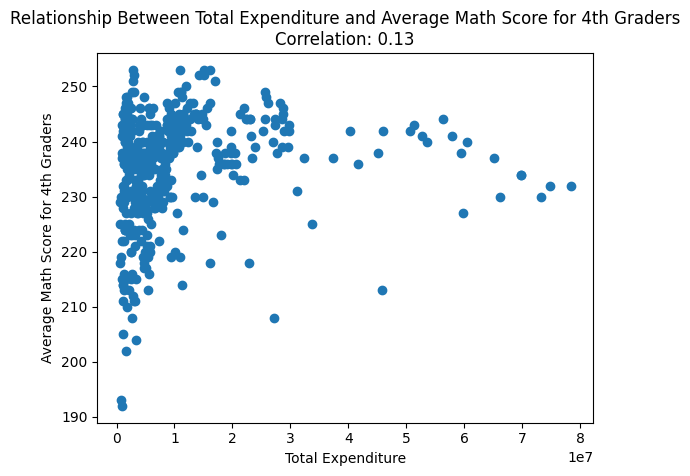

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation coefficient between total expenditure and average math score for 4th graders
correlation = df['TOTAL_EXPENDITURE'].corr(df['AVG_MATH_4_SCORE'])

# Plot the scatter plot to show the relationship between the two variables
plt.scatter(df['TOTAL_EXPENDITURE'], df['AVG_MATH_4_SCORE'])

# Add labels for the X and Y axes
plt.xlabel('Total Expenditure')  # Label for the X-axis
plt.ylabel('Average Math Score for 4th Graders')  # Label for the Y-axis

# Add a title to the chart, including the correlation coefficient
plt.title(f'Relationship Between Total Expenditure and Average Math Score for 4th Graders\nCorrelation: {correlation:.2f}')  # Chart title, including the correlation coefficient

# Display the chart
plt.show()


**<CAPTION FOR VIZ 1>**

**Visualization 2**

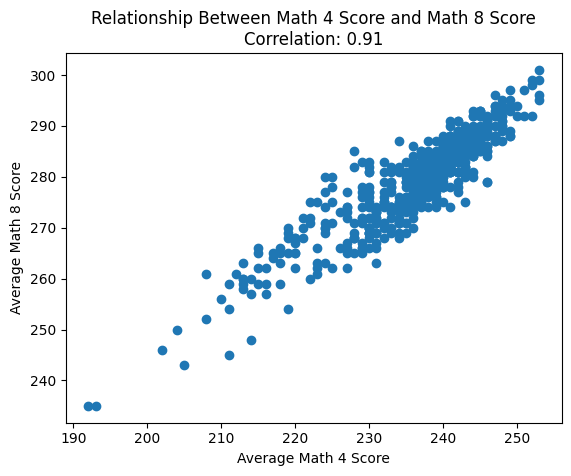

In [98]:
import matplotlib.pyplot as plt

# Calculate the correlation coefficient between AVG_MATH_4_SCORE and AVG_MATH_8_SCORE
correlation = df['AVG_MATH_4_SCORE'].corr(df['AVG_MATH_8_SCORE'])

# Plot the scatter plot to show the relationship between the two variables
plt.scatter(df['AVG_MATH_4_SCORE'], df['AVG_MATH_8_SCORE'])

# Add labels for the X and Y axes
plt.xlabel('Average Math 4 Score')  # Label for the X-axis
plt.ylabel('Average Math 8 Score')  # Label for the Y-axis

# Add a title to the chart, including the correlation coefficient
plt.title(f'Relationship Between Math 4 Score and Math 8 Score\nCorrelation: {correlation:.2f}')  # Chart title, including the correlation coefficient

# Display the chart
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
# X = 
# y = 
X = df[['TOTAL_EXPENDITURE', 'STATE_REVENUE', 'AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace = True)

In [101]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [102]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [103]:
# create your model here
# model = 
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)
y_pred

array([285.86991152, 266.51310597, 288.33616513, 282.64164295,
       284.52754231, 279.92281675, 294.00236572, 281.52054538,
       270.46129723, 291.11369063, 267.65408915, 284.51384648,
       282.56113055, 287.25215674, 285.08059201, 271.43067829,
       280.83788059, 281.17790805, 287.2929464 , 279.87098379,
       269.51397473, 283.72472837, 279.98644057, 273.90800724,
       276.07073647, 286.3428651 , 288.3268603 , 282.58131852,
       278.06169444, 283.6028551 , 277.9334163 , 286.48604944,
       284.43463674, 285.78758458, 271.51000377, 286.40502909,
       273.32741092, 279.16040247, 284.08266769, 287.26760723,
       291.29467232, 283.5384988 , 285.486861  , 277.0994346 ,
       273.27343275, 288.24469222, 285.90435364, 293.16226474,
       278.85814821, 284.42892377, 282.6464092 , 284.58466877,
       283.77502823, 286.04223978, 270.69091813, 281.96382889,
       272.2752742 , 285.40296538, 286.43247802, 282.71374817,
       271.40636203, 277.31590087, 269.53867984, 290.23

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [106]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
np.mean(np.abs(model.predict(X_test)-y_test))

33.71004513478749
[-5.72785867e-08  1.72243798e-07  9.39036345e-01]
0.5732834743447395


3.505162775389709

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

0.8022012203365702


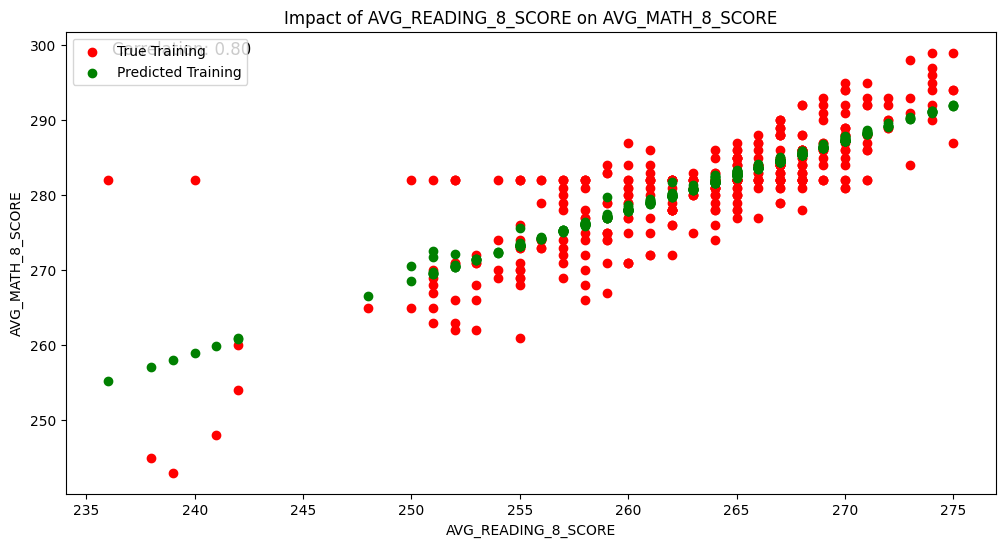

In [107]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")


# Assuming you've already defined and trained 'model'
# and have your 'X_train' and 'y_train' ready


import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train' and 'y_train' are already defined, and 'model' is your trained model

# Specify the predictor variable you want to analyze
col_name = 'AVG_READING_8_SCORE'

# Calculate the correlation coefficient between 'AVG_READING_4_SCORE' and 'AVG_MATH_8_SCORE'
correlation = np.corrcoef(X_train[col_name], y_train)[0, 1]

# Creating a figure with specific size
f = plt.figure(figsize=(12,6))

# Plotting true training values as red dots
plt.scatter(X_train[col_name], y_train, color="red")

# Plotting predicted training values as green dots
plt.scatter(X_train[col_name], model.predict(X_train), color="green")

# Adding a legend to differentiate between true training values and predicted training values
plt.legend(['True Training', 'Predicted Training'])

# Setting the labels for the x-axis and the y-axis
plt.xlabel('AVG_READING_8_SCORE')
plt.ylabel('AVG_MATH_8_SCORE')

# Adding a title to the plot
plt.title("Impact of AVG_READING_8_SCORE on AVG_MATH_8_SCORE")

# Annotating the plot with the correlation coefficient
# You may adjust the position (x, y) based on your plot's layout
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Displaying the plot
print(correlation)
plt.show()





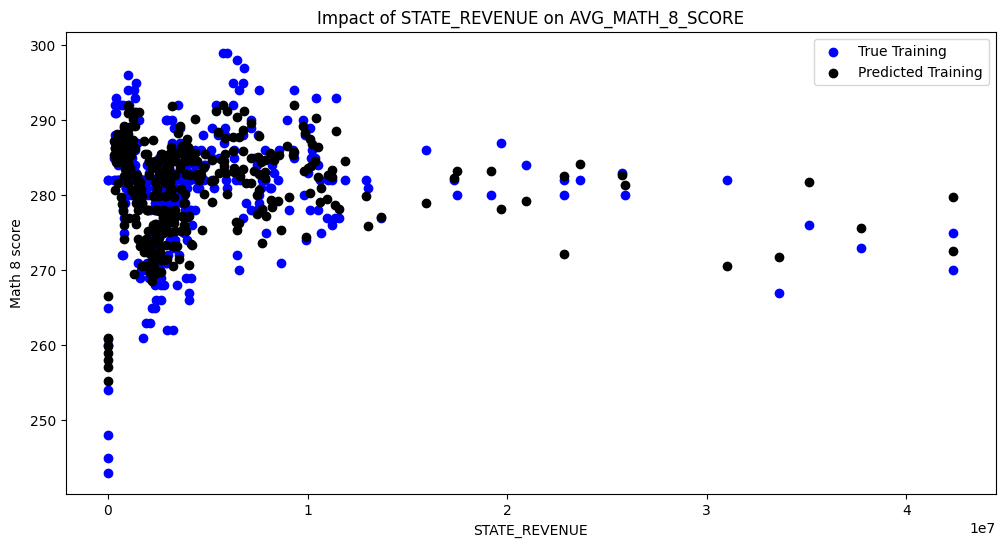

Correlation between STATE_REVENUE and AVG_MATH_8_SCORE: -0.00
-0.0017901743923030623


In [108]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

import matplotlib.pyplot as plt
import numpy as np

# Update the column name to 'STATE_REVENUE' for analysis
col_name = 'STATE_REVENUE'

# Create a figure with specified size
f = plt.figure(figsize=(12,6))

# Scatter plot of true training values in red
plt.scatter(X_train[col_name], y_train, color="blue")

# Scatter plot of predicted training values in green
plt.scatter(X_train[col_name], model.predict(X_train), color="black")

# Adding a legend to differentiate between true and predicted training values
plt.legend(['True Training', 'Predicted Training'])

# Setting the labels for the x-axis and the y-axis
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

# Setting the title of the plot
plt.title("Impact of STATE_REVENUE on AVG_MATH_8_SCORE")

# Display the plot
plt.show()

# Calculate the correlation coefficient between 'STATE_REVENUE' and 'AVG_MATH_8_SCORE'
correlation = np.corrcoef(X_train[col_name], y_train)[0, 1]

# Print the correlation for additional insight
print(f'Correlation between STATE_REVENUE and AVG_MATH_8_SCORE: {correlation:.2f}')
print(correlation)




<h2> Summary </h2>





**WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL**

A correlation coefficient of 0.8 suggests that students who perform well in reading also tend to achieve high scores in math. This means that a good education can lead to the improvement of both humanities and quantitative reasoning.

It should be noted that the correlation between state revenue and student math achievement is close to zero, which means that the economic situation of a state has minimal impact on the math performance of its students. Also the low correlation of education expenditrue and grade 4 math grades challenges the conventional opion about student achievement and finacial resources.

